# Crecimiento monetario

Este notebook tiene los siguientes objetivos:
- Mostrar las diferencias en el crecimiento de la cantidad de dinero en diferentes economías.
- Establecer una relación entre crecimiento de la cantidad de dinero, la velocidad del dinero y la inflación.

Se estudiarán las siguientes áreas monetarias: los Estados Unidos, la Eurozona, Suiza, el Reino Unido y Japón.

In [236]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils import get_snb_data, get_ecb_data
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## Recesiones

Datos obtenidoss de NBER: [US Business Cycle Expansions and Contractions](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions).

In [237]:
df_recessions = pd.DataFrame([
    [pd.Timestamp('1857-04-01'), pd.Timestamp('1858-10-01')],
    [pd.Timestamp('1860-07-01'), pd.Timestamp('1861-07-01')],
    [pd.Timestamp('1865-01-01'), pd.Timestamp('1867-01-01')],
    [pd.Timestamp('1869-04-01'), pd.Timestamp('1870-10-01')],
    [pd.Timestamp('1873-07-01'), pd.Timestamp('1879-01-01')],
    [pd.Timestamp('1882-01-01'), pd.Timestamp('1885-04-01')],
    [pd.Timestamp('1887-04-01'), pd.Timestamp('1888-01-01')],
    [pd.Timestamp('1890-07-01'), pd.Timestamp('1891-04-01')],
    [pd.Timestamp('1893-01-01'), pd.Timestamp('1894-04-01')],
    [pd.Timestamp('1895-10-01'), pd.Timestamp('1897-04-01')],
    [pd.Timestamp('1899-07-01'), pd.Timestamp('1900-10-01')],
    [pd.Timestamp('1902-10-01'), pd.Timestamp('1904-07-01')],
    [pd.Timestamp('1907-04-01'), pd.Timestamp('1908-04-01')],
    [pd.Timestamp('1910-01-01'), pd.Timestamp('1911-10-01')],
    [pd.Timestamp('1913-01-01'), pd.Timestamp('1914-10-01')],
    [pd.Timestamp('1918-07-01'), pd.Timestamp('1919-01-01')],
    [pd.Timestamp('1920-01-01'), pd.Timestamp('1921-07-01')],
    [pd.Timestamp('1923-04-01'), pd.Timestamp('1924-07-01')],
    [pd.Timestamp('1926-07-01'), pd.Timestamp('1927-10-01')],
    [pd.Timestamp('1929-07-01'), pd.Timestamp('1933-01-01')],
    [pd.Timestamp('1937-04-01'), pd.Timestamp('1938-04-01')],
    [pd.Timestamp('1945-01-01'), pd.Timestamp('1945-10-01')],
    [pd.Timestamp('1948-10-01'), pd.Timestamp('1949-10-01')],
    [pd.Timestamp('1953-04-01'), pd.Timestamp('1954-04-01')],
    [pd.Timestamp('1957-07-01'), pd.Timestamp('1958-04-01')],
    [pd.Timestamp('1960-04-01'), pd.Timestamp('1961-01-01')],
    [pd.Timestamp('1969-10-01'), pd.Timestamp('1970-10-01')],
    [pd.Timestamp('1973-10-01'), pd.Timestamp('1975-01-01')],
    [pd.Timestamp('1980-01-01'), pd.Timestamp('1980-07-01')],
    [pd.Timestamp('1981-07-01'), pd.Timestamp('1982-10-01')],
    [pd.Timestamp('1990-07-01'), pd.Timestamp('1991-01-01')],
    [pd.Timestamp('2001-01-01'), pd.Timestamp('2001-10-01')],
    [pd.Timestamp('2007-10-01'), pd.Timestamp('2009-04-01')],
    [pd.Timestamp('2019-10-01'), pd.Timestamp('2020-04-01')]],
    columns=['quarter_start', 'quarter_end'])

def add_recessions(df): 
    df['recession'] = 0
    for row in df_recessions.itertuples():
        df.loc[row.quarter_start : row.quarter_end, 'recession'] = 1

def plot_recessions(ax):
    for row in df_recessions.itertuples():
        ax.axvspan(row.quarter_start, row.quarter_end, facecolor='lightgray')

## Carga de datos

### Estados Unidos

Datos:
- PIB: Gross Domestic Product, Quarterly, Billions of Dollars [GDP](https://fred.stlouisfed.org/series/GDP).
- M3: [ShadowStats](http://www.shadowstats.com).
- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average. Seasonally adjusted: [FRED CPIAUCSL](CPIAUCSL).

In [238]:
from fredapi import Fred

fred = Fred(api_key=os.environ.get('FRED_API_KEY'))

In [239]:
df_us = pd.read_csv('data/m3-us.csv', sep=';', parse_dates=['Date'], index_col='Date') # Monthly data
df_us['gdp'] = fred.get_series('GDP') # Quarterly data
df_us['cpi'] = fred.get_series('CPIAUCSL') # Monthly data

# df_us.dropna(inplace=True) # Remove NaN
df_us['v'] = df_us['gdp']/df_us['m3']

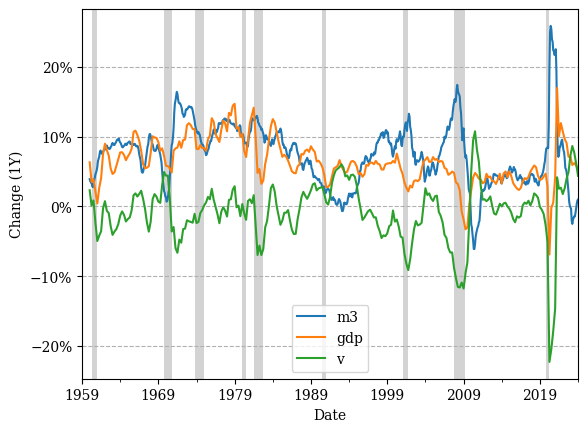

In [240]:
fig, ax = plt.subplots()

df_us[['m3']].pct_change(periods=12, fill_method=None).plot(ax=ax)
df_us[['gdp', 'v']].dropna().pct_change(periods=4, fill_method=None).plot(ax=ax)
plot_recessions(ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or both
ax.set_ylabel('Change (1Y)');

### Eurozona

Datos: 
- GDP: dos opciones:
    - Gross domestic product at market prices, Euro area 20 (fixed composition) as of 1 January 2023, Quarterly. [ECB](https://data.ecb.europa.eu/data/datasets/MNA/MNA.Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.N)
    - **Gross domestic product at market prices, Euro area (Member States and Institutions of the Euro Area) changing composition, Quarterly.** [ECB](https://data.ecb.europa.eu/data/datasets/MNA/MNA.Q.N.U2.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.V.N)
- M3: Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (stocks), Euro area (changing composition), Monthly. [ECB](https://data.ecb.europa.eu/data/datasets/BSI/BSI.M.U2.N.V.M30.X.1.U2.2300.Z01.E).
- HICP: HICP - Overall index, Euro area (changing composition), Monthly. [ECB](https://data.ecb.europa.eu/data/datasets/ICP/ICP.M.U2.N.000000.4.INX).

In [279]:
from importlib import reload
import utils
reload(utils)
from utils import get_snb_data, get_ecb_data


df_eu = pd.DataFrame()
df_eu['m3'] = get_ecb_data('BSI',
                     'M.U2.N.V.M30.X.1.U2.2300.Z01.E') # Monthly data
df_eu['gdp'] = get_ecb_data('MNA',
                      'Q.N.U2.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.V.N') # Quarterly data
                    #   'Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.N') # Quarterly data
df_eu['cpi'] = get_ecb_data('ICP',
                     'M.U2.N.000000.4.INX') # Monthly data
# df_eu.dropna(inplace=True) # Remove NaN
df_eu['v'] = df_eu['gdp']/df_eu['m3']

c:\Data\workspace\money-growth\utils.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(io.StringIO(response.text), parse_dates=[


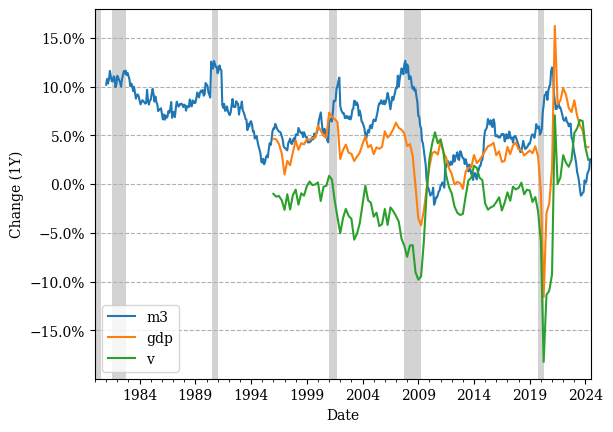

In [280]:
fig, ax = plt.subplots()

df_eu[['m3']].pct_change(periods=12, fill_method=None).plot(ax=ax)
df_eu[['gdp', 'v']].dropna().pct_change(periods=4, fill_method=None).plot(ax=ax)
plot_recessions(ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or both
ax.set_ylabel('Change (1Y)');

### Suiza

- Inflation according to the national consumer price index: ambas series coinciden exactamente cuando se calcula el porcentaje de cambio.
    - `plkopr{LD2010100}`: National index (Dec. 2020=100) [SNB](https://data.snb.ch/en/topics/uvo/cube/plkopr).
    - `plkoprinfla{TLK}`: Change [SNB](https://data.snb.ch/en/topics/uvo/cube/plkoprinfla).

Otra opción para inflación: 
- Eurostat HICP - monthly data (index). [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_midx/default/table?lang=en&category=prc.prc_hicp).

In [346]:
df_ch = pd.DataFrame()

table_id = "snbmonagg"
params = {'dimSel': 'D0(B),D1(GM3)',
          'fromDate': '1980-01',
          }

df_ch['m3'] = get_snb_data(table_id, params)['Value'] # Monthly data

table_id = "gdpap"
params = {'dimSel': 'D0(WMF),D1(BBIPS)',
          'fromDate': '1980-01',
          # 'toDate': '2024-04'
          }
df_ch['gdp'] = get_snb_data(table_id, params)['Value'] # Quarterly data

table_id = 'plkopr'
params = {'dimSel': 'D0(LD2010100)',
          'fromDate': '1980-01',
          }
df_ch['cpi'] = get_snb_data(table_id, params)['Value'] # Monthly data

df_ch['v'] = df_ch['gdp']/df_ch['m3']

c:\Data\workspace\money-growth\utils.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url,


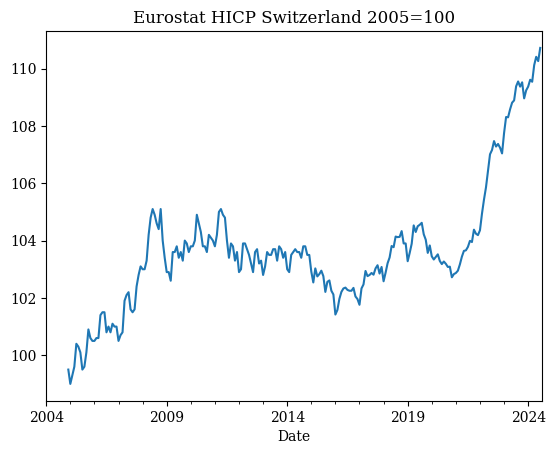

In [326]:
import eurostat

data = eurostat.get_data_df('prc_hicp_midx', filter_pars={'geo': ['CH'], 'unit': ['I05'], 'coicop': ['CP00']})

df = data.melt(id_vars=['freq', 'unit', 'coicop', r'geo\TIME_PERIOD'], var_name='Date', value_name='Value')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

df.set_index('Date')['Value'].plot(title='Eurostat HICP Switzerland 2005=100', xlim=['2004', None]);

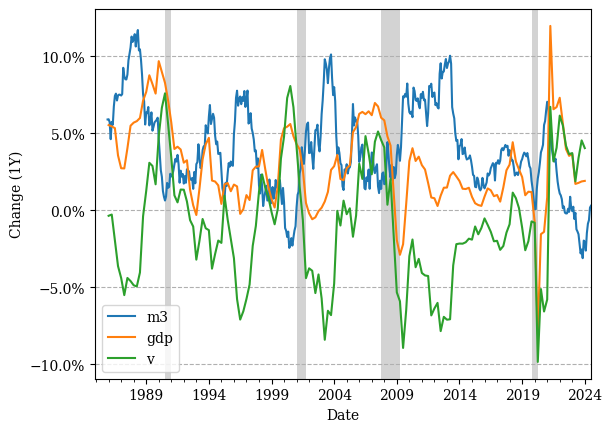

In [282]:
fig, ax = plt.subplots()

df_ch[['m3']].pct_change(periods=12, fill_method=None).plot(ax=ax)
df_ch[['gdp', 'v']].dropna().pct_change(periods=4, fill_method=None).plot(ax=ax)
plot_recessions(ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or both
ax.set_ylabel('Change (1Y)');

### Japón

Datos:
- M3: MD02'MAM1NAM3M3MO: M3/Average Amounts Outstanding/Money Stock [BoJ Time-Series Data Search](https://www.stat-search.boj.or.jp/ssi/mtshtml/md02_m_1_en.html).
- CPI: [Measures of Underlying Inflation](https://www.boj.or.jp/en/research/research_data/cpi/index.htm).

Referencia sobre agregados monetarios: [Monetary Aggregates (market volume, outstanding)](https://www.boj.or.jp/en/statistics/outline/note/notest31.htm).

In [283]:
df_jp = pd.DataFrame()
df_jp['cpi'] = pd.read_csv('data/cpi-jp.csv',
                           parse_dates=['Date'],
                           index_col='Date')[r'Trimmed mean (y/y % chg.)'] # Monthly data
df_jp['m3'] = pd.read_csv('data/m3-jp.csv',
                          skiprows=3,
                          names=['Date', 'Value'],
                          parse_dates=['Date'],
                          date_format={'Date': '%Y/%m'},
                          index_col='Date') # Monthly data

## Exploración de datos

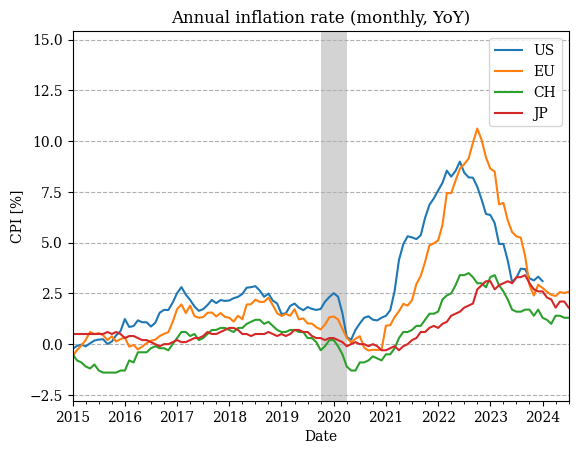

In [284]:
fig, ax = plt.subplots()

(100*df_us['cpi'].pct_change(periods=12)).plot(ax=ax, label='US')
(100*df_eu['cpi'].pct_change(periods=12)).plot(ax=ax, label='EU')
df_ch['cpi'].plot(ax=ax, label='CH')
df_jp['cpi'].plot(ax=ax, label='JP')

plot_recessions(ax)

ax.set_xlim(['2015', None])
ax.grid(which='major', axis='y', linestyle='--')  #  or bothdd
ax.set_title('Annual inflation rate (monthly, YoY)')
ax.set_ylabel('CPI [%]')
ax.legend();

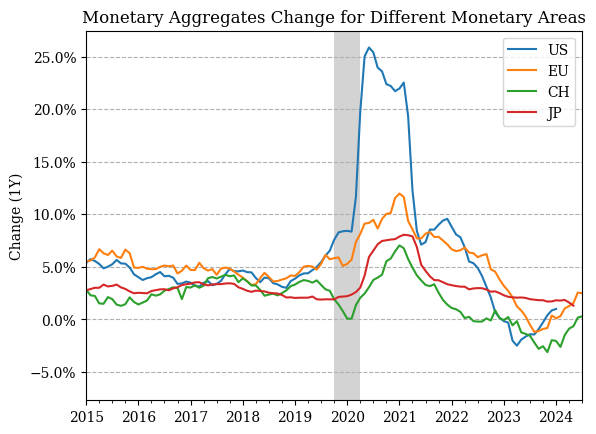

In [247]:
fig, ax = plt.subplots()

df_us['m3'].pct_change(periods=12).plot(ax=ax, label='US')
df_eu['m3'].pct_change(periods=12).plot(ax=ax, label='EU')
df_ch['m3'].pct_change(periods=12).plot(ax=ax, label='CH')
df_jp['m3'].pct_change(periods=12, fill_method=None).plot(ax=ax, label='JP')
plot_recessions(ax)

ax.set_xlim(['2015', None])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or bothdd
ax.set_xlabel('')
ax.set_ylabel('Change (1Y)')
ax.set_title('Monetary Aggregates Change for Different Monetary Areas');
ax.legend();

## Análisis de la velocidad de circulación del dinero

### Contraste de hipótesis

$H_0$: El valor medio de $\Delta\log(v_t)$ es cero.

Se rechaza la hipótesis nula con una significacia mayor al 99%.

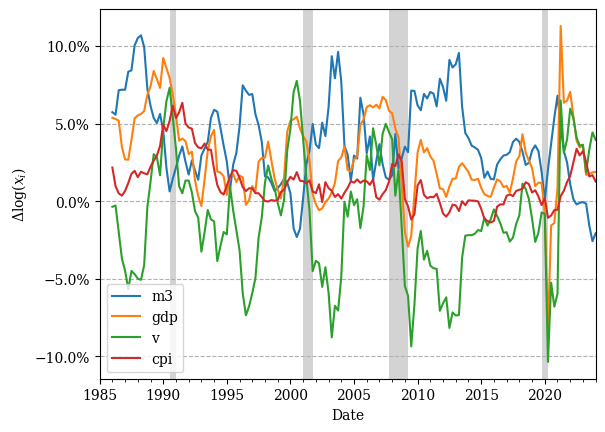

In [347]:
# df_deltaLog = df_ch[['m3', 'gdp', 'v']].dropna().apply(np.log).diff(periods=4)
# df_deltaLog['cpi'] = df_eu['cpi']/100
df_deltaLog = df_ch[['m3', 'gdp', 'v', 'cpi']].dropna().apply(np.log).diff(periods=4)

add_recessions(df_deltaLog)

fig, ax = plt.subplots()
df_deltaLog[['m3', 'gdp', 'v', 'cpi']].plot(ax=ax)
plot_recessions(ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(which='major', axis='y', linestyle='--')  #  or both
ax.set_ylabel(r'$\Delta\log(x_i)$');

In [348]:
from scipy.stats import t

mu_0 = 0
mean_yi = df_deltaLog['v'].mean()
sm_yi = df_deltaLog['v'].std()
T = df_deltaLog['v'].count()  #  Excluye valores N/A
sm_medias = sm_yi / np.sqrt(T)

t_score = (mean_yi - mu_0) / sm_medias
p_value = 2*t.sf(np.abs(t_score), T-1)
print(f'p-value: {p_value:.5f}')
# Se rechaza H0: mu0=0 al 99%

print(f'mu = {mean_yi*100:.2f}%')
print(
    f"mu = {df_deltaLog.loc[:'2019-12-31', 'v'].mean()*100:.2f}% (hasta 2019.IV)")

print(f'std = {sm_yi*100:.2f}%')
print(
    f"std = {df_deltaLog.loc[:'2019-12-31', 'v'].std()*100:.2f}% (hasta 2019.IV)")

p-value: 0.00084
mu = -1.08%
mu = -1.36% (hasta 2019.IV)
std = 3.91%
std = 3.65% (hasta 2019.IV)


In [349]:
# %% Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_deltaLog['v'].dropna(), regression='c', autolag='AIC')
print('Augmented Dickey-Fuller')
print(f'\tADF statistic: {result[0]}')
print(f'\tp-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller
	ADF statistic: -3.365822712104745
	p-value: 0.01218063611422155
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578


### Autorregresión de Markov

$\Delta\log v_t = \mu_{S_t} + \beta d_\text{recession} + \varepsilon_t$

$\varepsilon_t \sim N(0, \sigma^2)$

$S_t\in \{0,1\}$

$P(S_t=s_t|S_{t-1}=s_{t-1})=
\begin{bmatrix}
  p_{00} & p_{10}\\
  1-p_{00} & 1-p_{10}
\end{bmatrix}$

$p_ij$ es la probabilidad de transicionar desde el régimen $i$ al régimen $j$.

Referencias:
- Reference: https://stackoverflow.com/questions/42796743/python-statsmodel-tsa-markovautoregression-using-current-real-gnp-gdp-data
- Reference: https://nbviewer.org/gist/ChadFulton/a5d24d32ba3b7b2e381e43a232342f1f
- statsmodels: https://www.statsmodels.org/dev/generated/statsmodels.tsa.regime_switching.markov_autoregression.MarkovAutoregression.html
- statsmodels: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_autoregression.html
- statsmodels: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html
- mswitch (Stata): https://www.stata.com/manuals14/tsmswitch.pdf


Estimated duration: [14.60111165 24.63320992]


c:\Data\workspace\money-growth\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      v   No. Observations:                  153
Model:               MarkovRegression   Log Likelihood                 328.495
Date:                Wed, 11 Sep 2024   AIC                           -644.991
Time:                        15:11:21   BIC                           -626.808
Sample:                    01-01-1986   HQIC                          -637.605
                         - 01-01-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0299      0.005      6.413      0.000       0.021       0.039
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0332      0.003    -11.046      0.000      -0.039      -0.027
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004      0.008      0.050      0.960      -0.015       0.016
sigma2         0.0006   7.15e-05      8.462      0.000       0.000       0.001
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9315      0.035     26.532      0.000       0.863       1.000
p[1->0]        0.0406      0.021      1.958      0.050   -4.73e-05       0.081
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

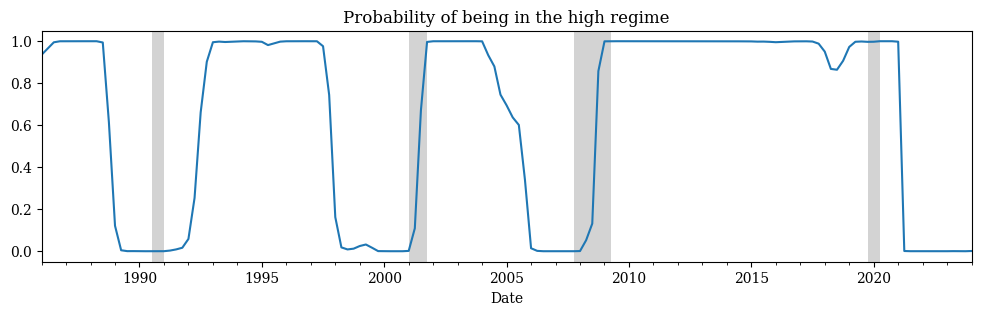

In [350]:
import statsmodels.api as sm

y = df_deltaLog.dropna()['v'].astype(float)
X = df_deltaLog.dropna()['recession'].astype(float)
# X = sm.add_constant(X) # Not to be included if the option trend='c' is specified at MarkovRegression

model = sm.tsa.MarkovRegression(
    y, k_regimes=2,
    exog=X,  
    switching_exog=False,
    # switching_trend=False,
    trend='c'
)
res = model.fit()

fig, ax = plt.subplots(figsize=(12, 3))

res.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", ax=ax
)
plot_recessions(ax)

print(f'Estimated duration: {res.expected_durations}')
res.summary()

# res.trend

R^2 = 0.7890
SST = 0.0368
SSE = 0.0078
SSR = 0.0286


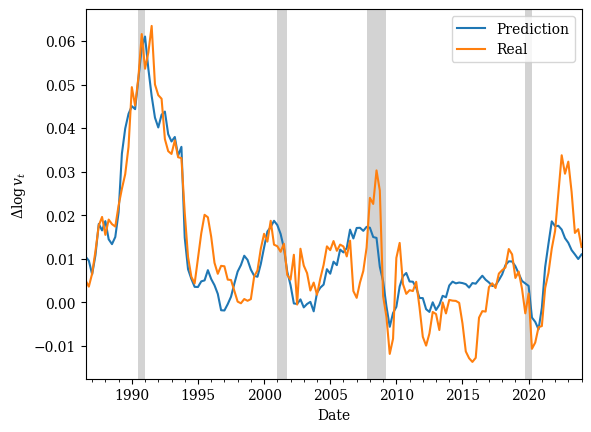

In [361]:
y_hat = res.predict()

fig, ax = plt.subplots()

y_hat.plot(ax=ax, label='Prediction')
y.plot(ax=ax, label='Real')
plot_recessions(ax)

ax.legend()
ax.set_ylabel(r'$\Delta\log v_t$');

y_mean = y.mean()

sst = ((y-y_mean)**2).sum()
sse = ((y-y_hat)**2).sum()
ssr = ((y_hat-y_mean)**2).sum()
r2 = 1-sse/sst

print(f'R^2 = {r2:.4f}')

print(f'SST = {sst:.4f}')
print(f'SSE = {sse:.4f}')
print(f'SSR = {ssr:.4f}')

### Inflación

c:\Data\workspace\money-growth\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Estimated duration: [140.94783248  23.04478538]


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                    cpi   No. Observations:                  151
Model:               MarkovRegression   Log Likelihood                 520.561
Date:                Wed, 11 Sep 2024   AIC                          -1013.122
Time:                        15:14:34   BIC                           -970.880
Sample:                    07-01-1986   HQIC                          -995.961
                         - 01-01-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.002      3.299      0.001       0.002       0.008
x4             0.0706      0.041      1.703      0.089      -0.011       0.152
x5             0.1060      0.091      1.164      0.245      -0.073       0.285
x6            -0.0232      0.067     -0.346      0.729      -0.155       0.108
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0442      0.004     11.396      0.000       0.037       0.052
x4             0.1331      0.070      1.893      0.058      -0.005       0.271
x5             0.0534      0.172      0.311      0.756      -0.283       0.390
x6            -0.2506      0.145     -1.725      0.085      -0.535       0.034
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0757      0.041      1.859      0.063      -0.004       0.156
x2             0.0386      0.067      0.574      0.566      -0.093       0.170
x3             0.0833      0.053      1.585      0.113      -0.020       0.186
sigma2      5.295e-05   6.15e-06      8.610      0.000    4.09e-05     6.5e-05
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9929      0.007    137.957      0.000       0.979       1.007
p[1->0]        0.0434      0.038      1.137      0.255      -0.031       0.118
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

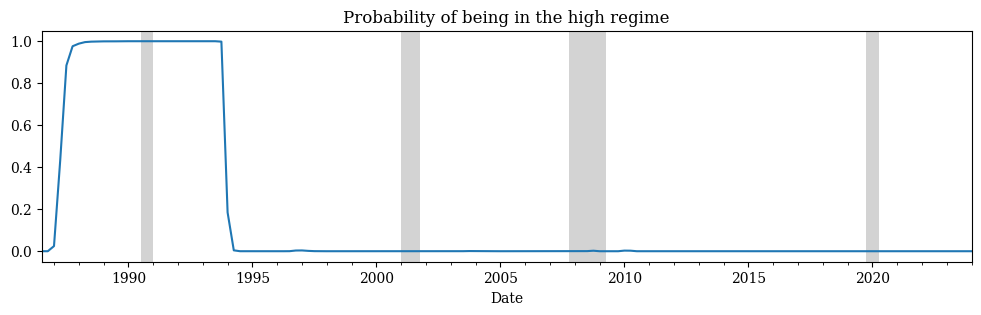

In [362]:
y = df_deltaLog.dropna()['cpi'].astype(float)
X = df_deltaLog.dropna()[['v', 'm3']].astype(float)

max_lags = 2

for i in range(1, max_lags+1):
    X[f'v_lag_{i}'] = X['v'].shift(i)

for i in range(1, max_lags+1):
    X[f'm3_lag_{i}'] = X['m3'].shift(i)

y = y[max_lags:]
X = X.iloc[max_lags:]
# X.drop('v', axis=1, inplace=True)

model = sm.tsa.MarkovRegression(
    y, k_regimes=2,
    exog=X,  
    # switching_exog={'v': False, 'm3': True},
    switching_exog=[False] * (max_lags + 1) + [True] * (max_lags+1),
    # switching_trend=False,
    trend='c'
)
res = model.fit()


fig, ax = plt.subplots(figsize=(12, 3))

res.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", ax=ax
)
plot_recessions(ax)

print(f'Estimated duration: {res.expected_durations}')
res.summary()

# res.trend

R^2 = 0.7890
SST = 0.0368
SSE = 0.0078
SSR = 0.0286


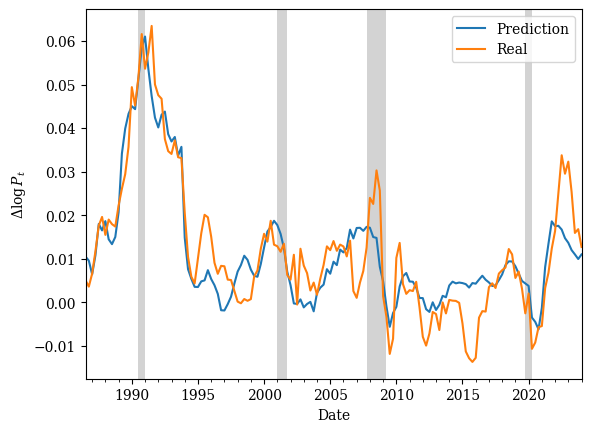

In [360]:
y_hat = res.predict()

fig, ax = plt.subplots()

y_hat.plot(ax=ax, label='Prediction')
y.plot(ax=ax, label='Real')
plot_recessions(ax)

ax.legend()
ax.set_ylabel(r'$\Delta\log P_t$');

# Compute errors
y_mean = y.mean()

sst = ((y-y_mean)**2).sum()
sse = ((y-y_hat)**2).sum()
ssr = ((y_hat-y_mean)**2).sum()
r2 = 1-sse/sst

print(f'R^2 = {r2:.4f}')

print(f'SST = {sst:.4f}')
print(f'SSE = {sse:.4f}')
print(f'SSR = {ssr:.4f}')